In [142]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler


In [143]:
df = pd.read_csv("round2/prices_round_2_day_-1.csv", delimiter=';')
df1 = pd.read_csv("round2/prices_round_2_day_0.csv", delimiter=';')
df2 = pd.read_csv("round2/prices_round_2_day_1.csv", delimiter=';')



df1["timestamp"] = df1["timestamp"] + df["timestamp"].iloc[-1] + 100
df2["timestamp"] = df2["timestamp"] + df1["timestamp"].iloc[-1] + 100


#merge the dataframes
df = pd.concat([df, df1, df2], ignore_index=True)
#reset the index
df.reset_index(drop=True, inplace=True)

df.to_csv("degub.csv", index=False)

In [144]:

#converting the data into mid_price and each product over time
#mid_price_pivot = df.pivot(index='timestamp', columns='product', values='mid_price')
mid_price_pivot = df.pivot_table(index='timestamp', columns='product', values='mid_price', aggfunc='mean')

#forward fill
mid_price_pivot.ffill(inplace=True)

mid_price_pivot



product,CROISSANTS,DJEMBES,JAMS,KELP,PICNIC_BASKET1,PICNIC_BASKET2,RAINFOREST_RESIN,SQUID_INK
timestamp,,,,,,,,
0,4304.5,13450.5,6670.5,2028.5,59289.0,30609.0,10003.0,2005.5
100,4304.5,13450.0,6670.5,2026.5,59287.0,30613.0,10000.0,2005.5
200,4304.5,13450.5,6671.0,2026.5,59293.5,30615.0,10000.0,2004.5
300,4304.5,13450.0,6672.0,2026.5,59293.5,30620.5,10000.0,2004.5
400,4305.5,13452.5,6672.0,2026.5,59292.0,30621.0,10000.0,2005.5
...,...,...,...,...,...,...,...,...
2999500,4268.5,13418.5,6520.0,2046.5,58720.5,30117.5,10001.0,1802.5
2999600,4268.5,13417.5,6519.5,2046.5,58719.5,30115.0,10000.0,1802.0
2999700,4268.5,13418.0,6519.5,2045.5,58715.0,30112.0,9999.0,1801.5


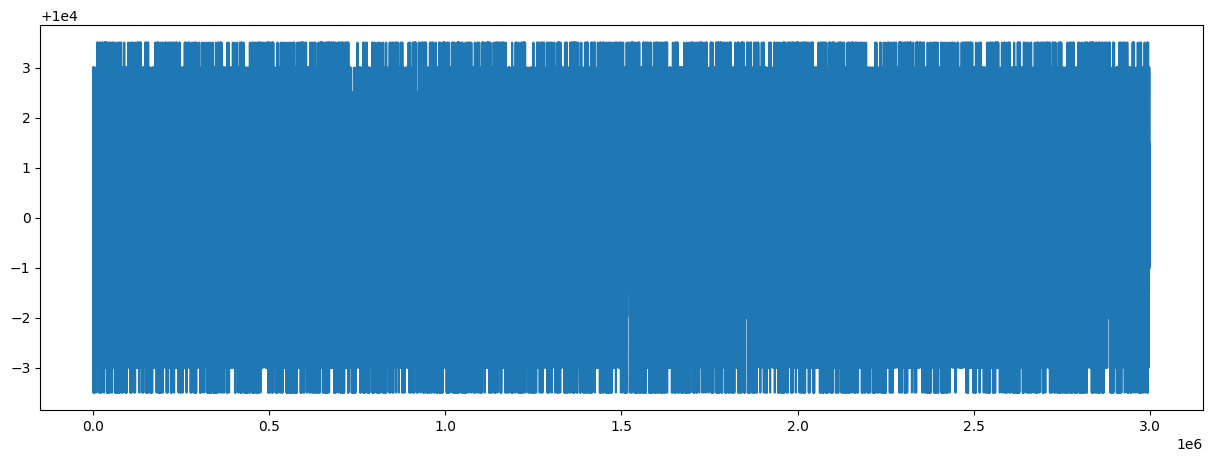

In [145]:
plt.figure(figsize=(15, 5))
plt.plot(mid_price_pivot["RAINFOREST_RESIN"])

In [146]:
Clean_data = mid_price_pivot.drop("RAINFOREST_RESIN", axis='columns')


In [147]:
Clean_data

product,CROISSANTS,DJEMBES,JAMS,KELP,PICNIC_BASKET1,PICNIC_BASKET2,SQUID_INK
timestamp,,,,,,,
0,4304.5,13450.5,6670.5,2028.5,59289.0,30609.0,2005.5
100,4304.5,13450.0,6670.5,2026.5,59287.0,30613.0,2005.5
200,4304.5,13450.5,6671.0,2026.5,59293.5,30615.0,2004.5
300,4304.5,13450.0,6672.0,2026.5,59293.5,30620.5,2004.5
400,4305.5,13452.5,6672.0,2026.5,59292.0,30621.0,2005.5
...,...,...,...,...,...,...,...
2999500,4268.5,13418.5,6520.0,2046.5,58720.5,30117.5,1802.5
2999600,4268.5,13417.5,6519.5,2046.5,58719.5,30115.0,1802.0
2999700,4268.5,13418.0,6519.5,2045.5,58715.0,30112.0,1801.5


In [148]:
# Make a copy to avoid changing the original
normalised_mid_prices = Clean_data.copy()

scaler = MinMaxScaler()
normalised_mid_prices.loc[:, :] = scaler.fit_transform(normalised_mid_prices)
normalised_mid_prices

product,CROISSANTS,DJEMBES,JAMS,KELP,PICNIC_BASKET1,PICNIC_BASKET2,SQUID_INK
timestamp,,,,,,,
0,0.597765,0.585586,0.843137,0.479452,0.641829,0.752877,0.863481
100,0.597765,0.582583,0.843137,0.424658,0.640389,0.757723,0.863481
200,0.597765,0.585586,0.845588,0.424658,0.645068,0.760145,0.860068
300,0.597765,0.582583,0.850490,0.424658,0.645068,0.766808,0.860068
400,0.608939,0.597598,0.850490,0.424658,0.643988,0.767414,0.863481
...,...,...,...,...,...,...,...
2999500,0.195531,0.393393,0.105392,0.972603,0.232541,0.157480,0.170648
2999600,0.195531,0.387387,0.102941,0.972603,0.231821,0.154452,0.168942
2999700,0.195531,0.390390,0.102941,0.945205,0.228582,0.150818,0.167235


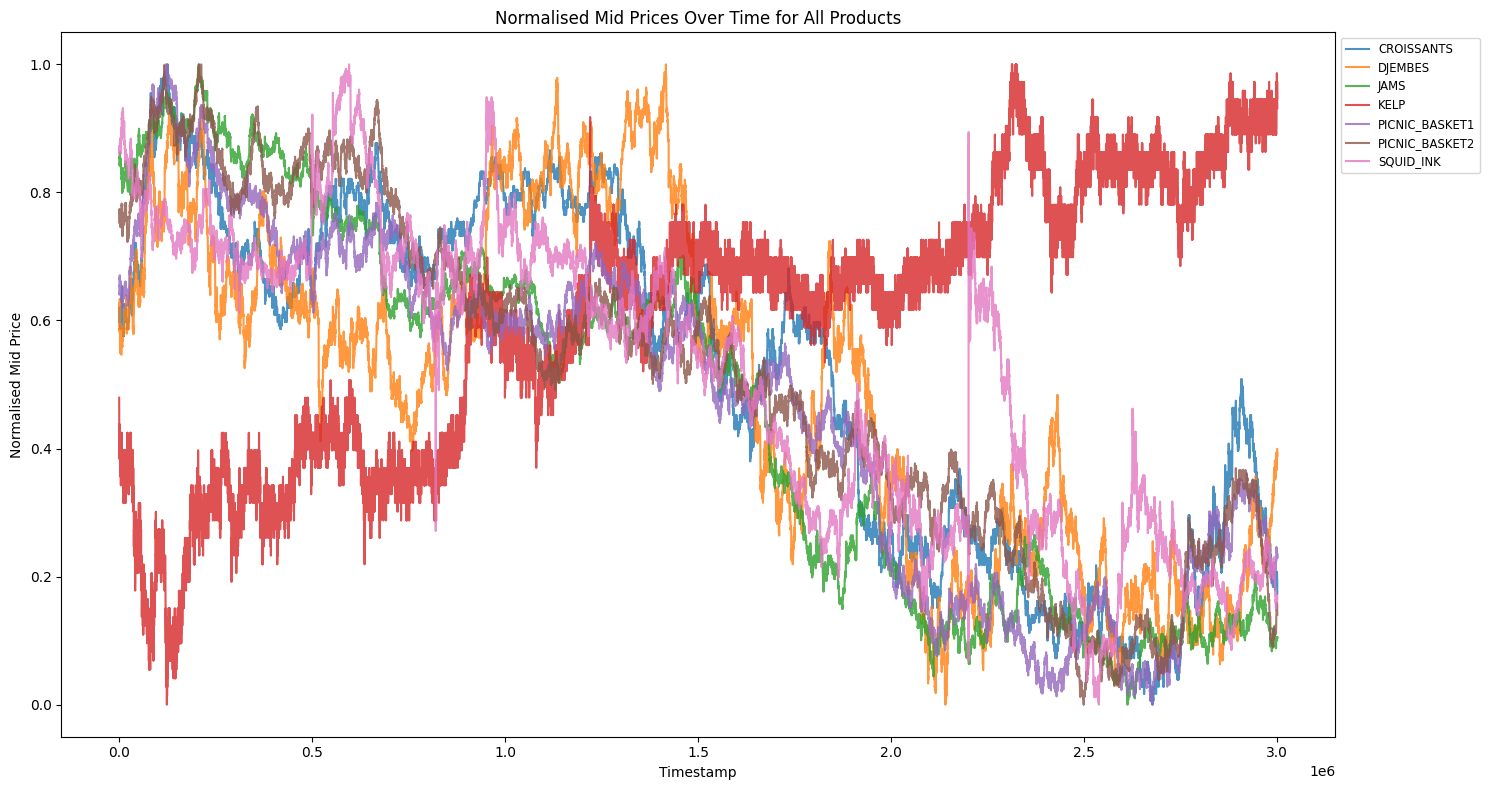

In [149]:
plt.figure(figsize=(15, 8))

for column in normalised_mid_prices.columns:
    plt.plot(normalised_mid_prices.index, normalised_mid_prices[column], label=column, alpha=0.8)

plt.title("Normalised Mid Prices Over Time for All Products")
plt.xlabel("Timestamp")
plt.ylabel("Normalised Mid Price")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize='small')
plt.tight_layout()
plt.show()

Spread calculation

In [150]:
from itertools import combinations
import pandas as pd

# Store spreads here
spreads = pd.DataFrame(index=normalised_mid_prices.index)

# Create all unique product pairs (A, B)
pairs = list(combinations(normalised_mid_prices.columns, 2))

for a, b in pairs:
    spread_name = f"{a} - {b}"
    spreads[spread_name] = normalised_mid_prices[a] - normalised_mid_prices[b]

spreads


,CROISSANTS - DJEMBES,CROISSANTS - JAMS,CROISSANTS - KELP,CROISSANTS - PICNIC_BASKET1,CROISSANTS - PICNIC_BASKET2,CROISSANTS - SQUID_INK,DJEMBES - JAMS,DJEMBES - KELP,DJEMBES - PICNIC_BASKET1,DJEMBES - PICNIC_BASKET2,...,JAMS - KELP,JAMS - PICNIC_BASKET1,JAMS - PICNIC_BASKET2,JAMS - SQUID_INK,KELP - PICNIC_BASKET1,KELP - PICNIC_BASKET2,KELP - SQUID_INK,PICNIC_BASKET1 - PICNIC_BASKET2,PICNIC_BASKET1 - SQUID_INK,PICNIC_BASKET2 - SQUID_INK
timestamp,,,,,,,,,,,,,,,,,,,,,
0,0.012180,-0.245372,0.118313,-0.044063,-0.155112,-0.265716,-0.257552,0.106134,-0.056243,-0.167291,...,0.363685,0.201309,0.090260,-0.020344,-0.162377,-0.273425,-0.384029,-0.111048,-0.221653,-0.110604
100,0.015183,-0.245372,0.173108,-0.042623,-0.159957,-0.265716,-0.260555,0.157925,-0.057806,-0.175140,...,0.418480,0.202748,0.085415,-0.020344,-0.215731,-0.333065,-0.438824,-0.117334,-0.223092,-0.105759
200,0.012180,-0.247823,0.173108,-0.047303,-0.162380,-0.262303,-0.260003,0.160928,-0.059483,-0.174560,...,0.420931,0.200520,0.085443,-0.014480,-0.220411,-0.335488,-0.435411,-0.115077,-0.215000,-0.099923
300,0.015183,-0.252725,0.173108,-0.047303,-0.169043,-0.262303,-0.267908,0.157925,-0.062486,-0.184225,...,0.425833,0.205422,0.083682,-0.009578,-0.220411,-0.342150,-0.435411,-0.121740,-0.215000,-0.093260
400,0.011341,-0.241552,0.184281,-0.035050,-0.158475,-0.254543,-0.252893,0.172940,-0.046391,-0.169816,...,0.425833,0.206502,0.083077,-0.012991,-0.219331,-0.342756,-0.438824,-0.123425,-0.219493,-0.096068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999500,-0.197863,0.090139,-0.777072,-0.037011,0.038050,0.024882,0.288001,-0.579209,0.160852,0.235913,...,-0.867211,-0.127149,-0.052088,-0.065256,0.740061,0.815122,0.801954,0.075061,0.061893,-0.013168
2999600,-0.191857,0.092590,-0.777072,-0.036291,0.041079,0.026589,0.284446,-0.585215,0.155566,0.232936,...,-0.869662,-0.128880,-0.051511,-0.066001,0.740781,0.818151,0.803661,0.077370,0.062879,-0.014490
2999700,-0.194860,0.092590,-0.749675,-0.033051,0.044713,0.028295,0.287449,-0.554815,0.161809,0.239573,...,-0.842264,-0.125641,-0.047877,-0.064294,0.716624,0.794388,0.777970,0.077764,0.061346,-0.016418


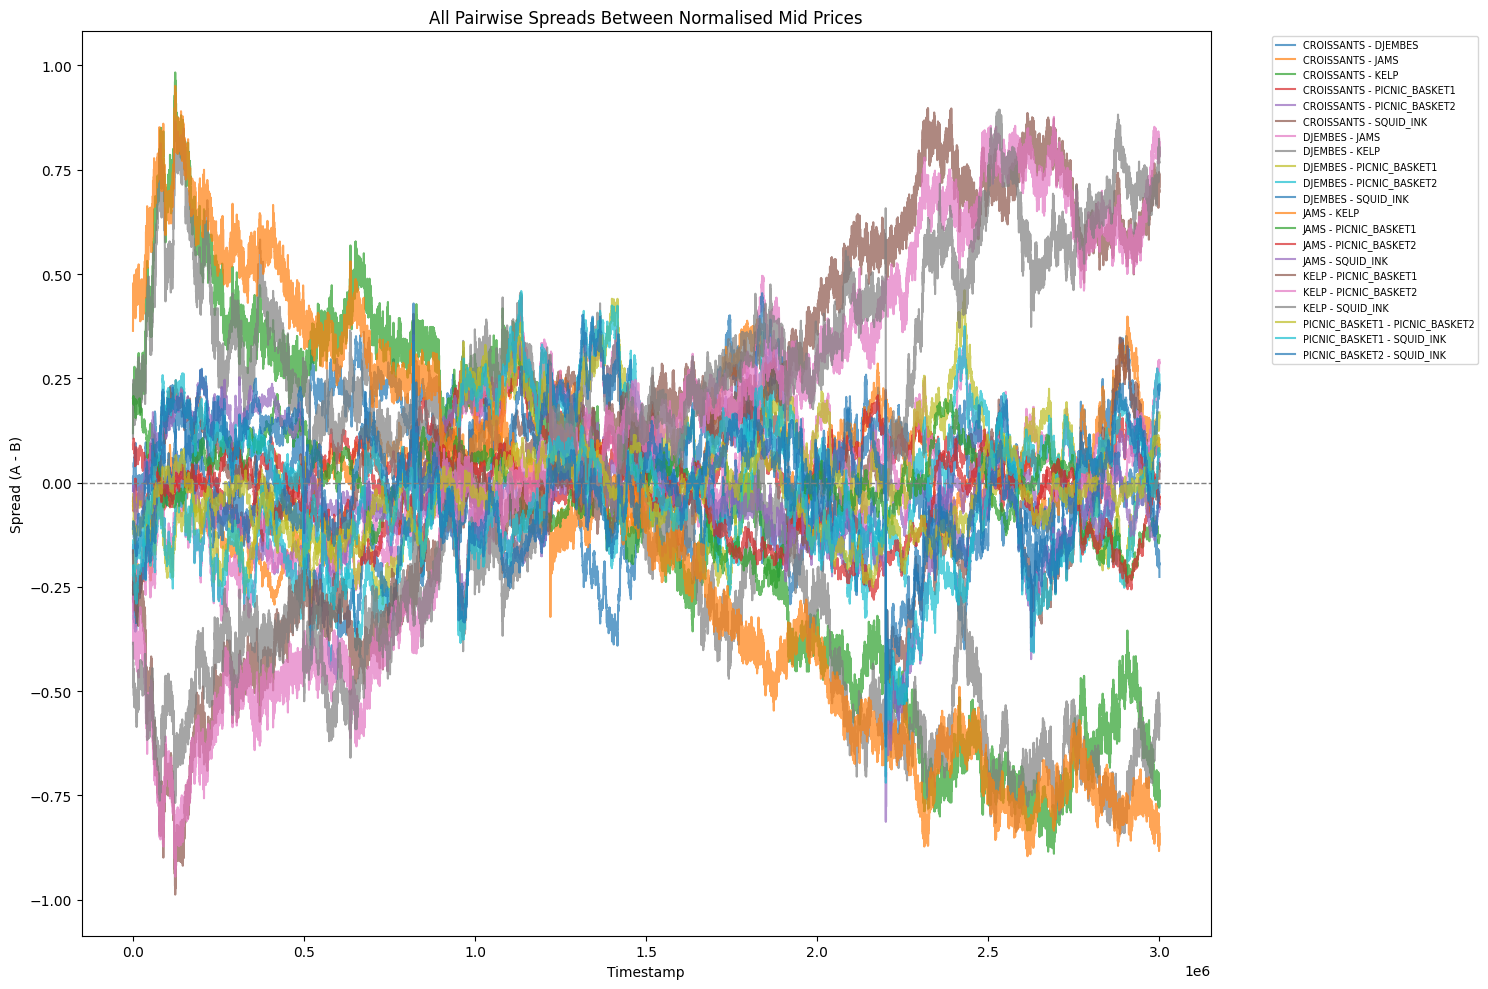

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for column in spreads.columns:
    plt.plot(spreads.index, spreads[column], label=column, alpha=0.7)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("All Pairwise Spreads Between Normalised Mid Prices")
plt.xlabel("Timestamp")
plt.ylabel("Spread (A - B)")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='x-small')
plt.tight_layout()
plt.show()


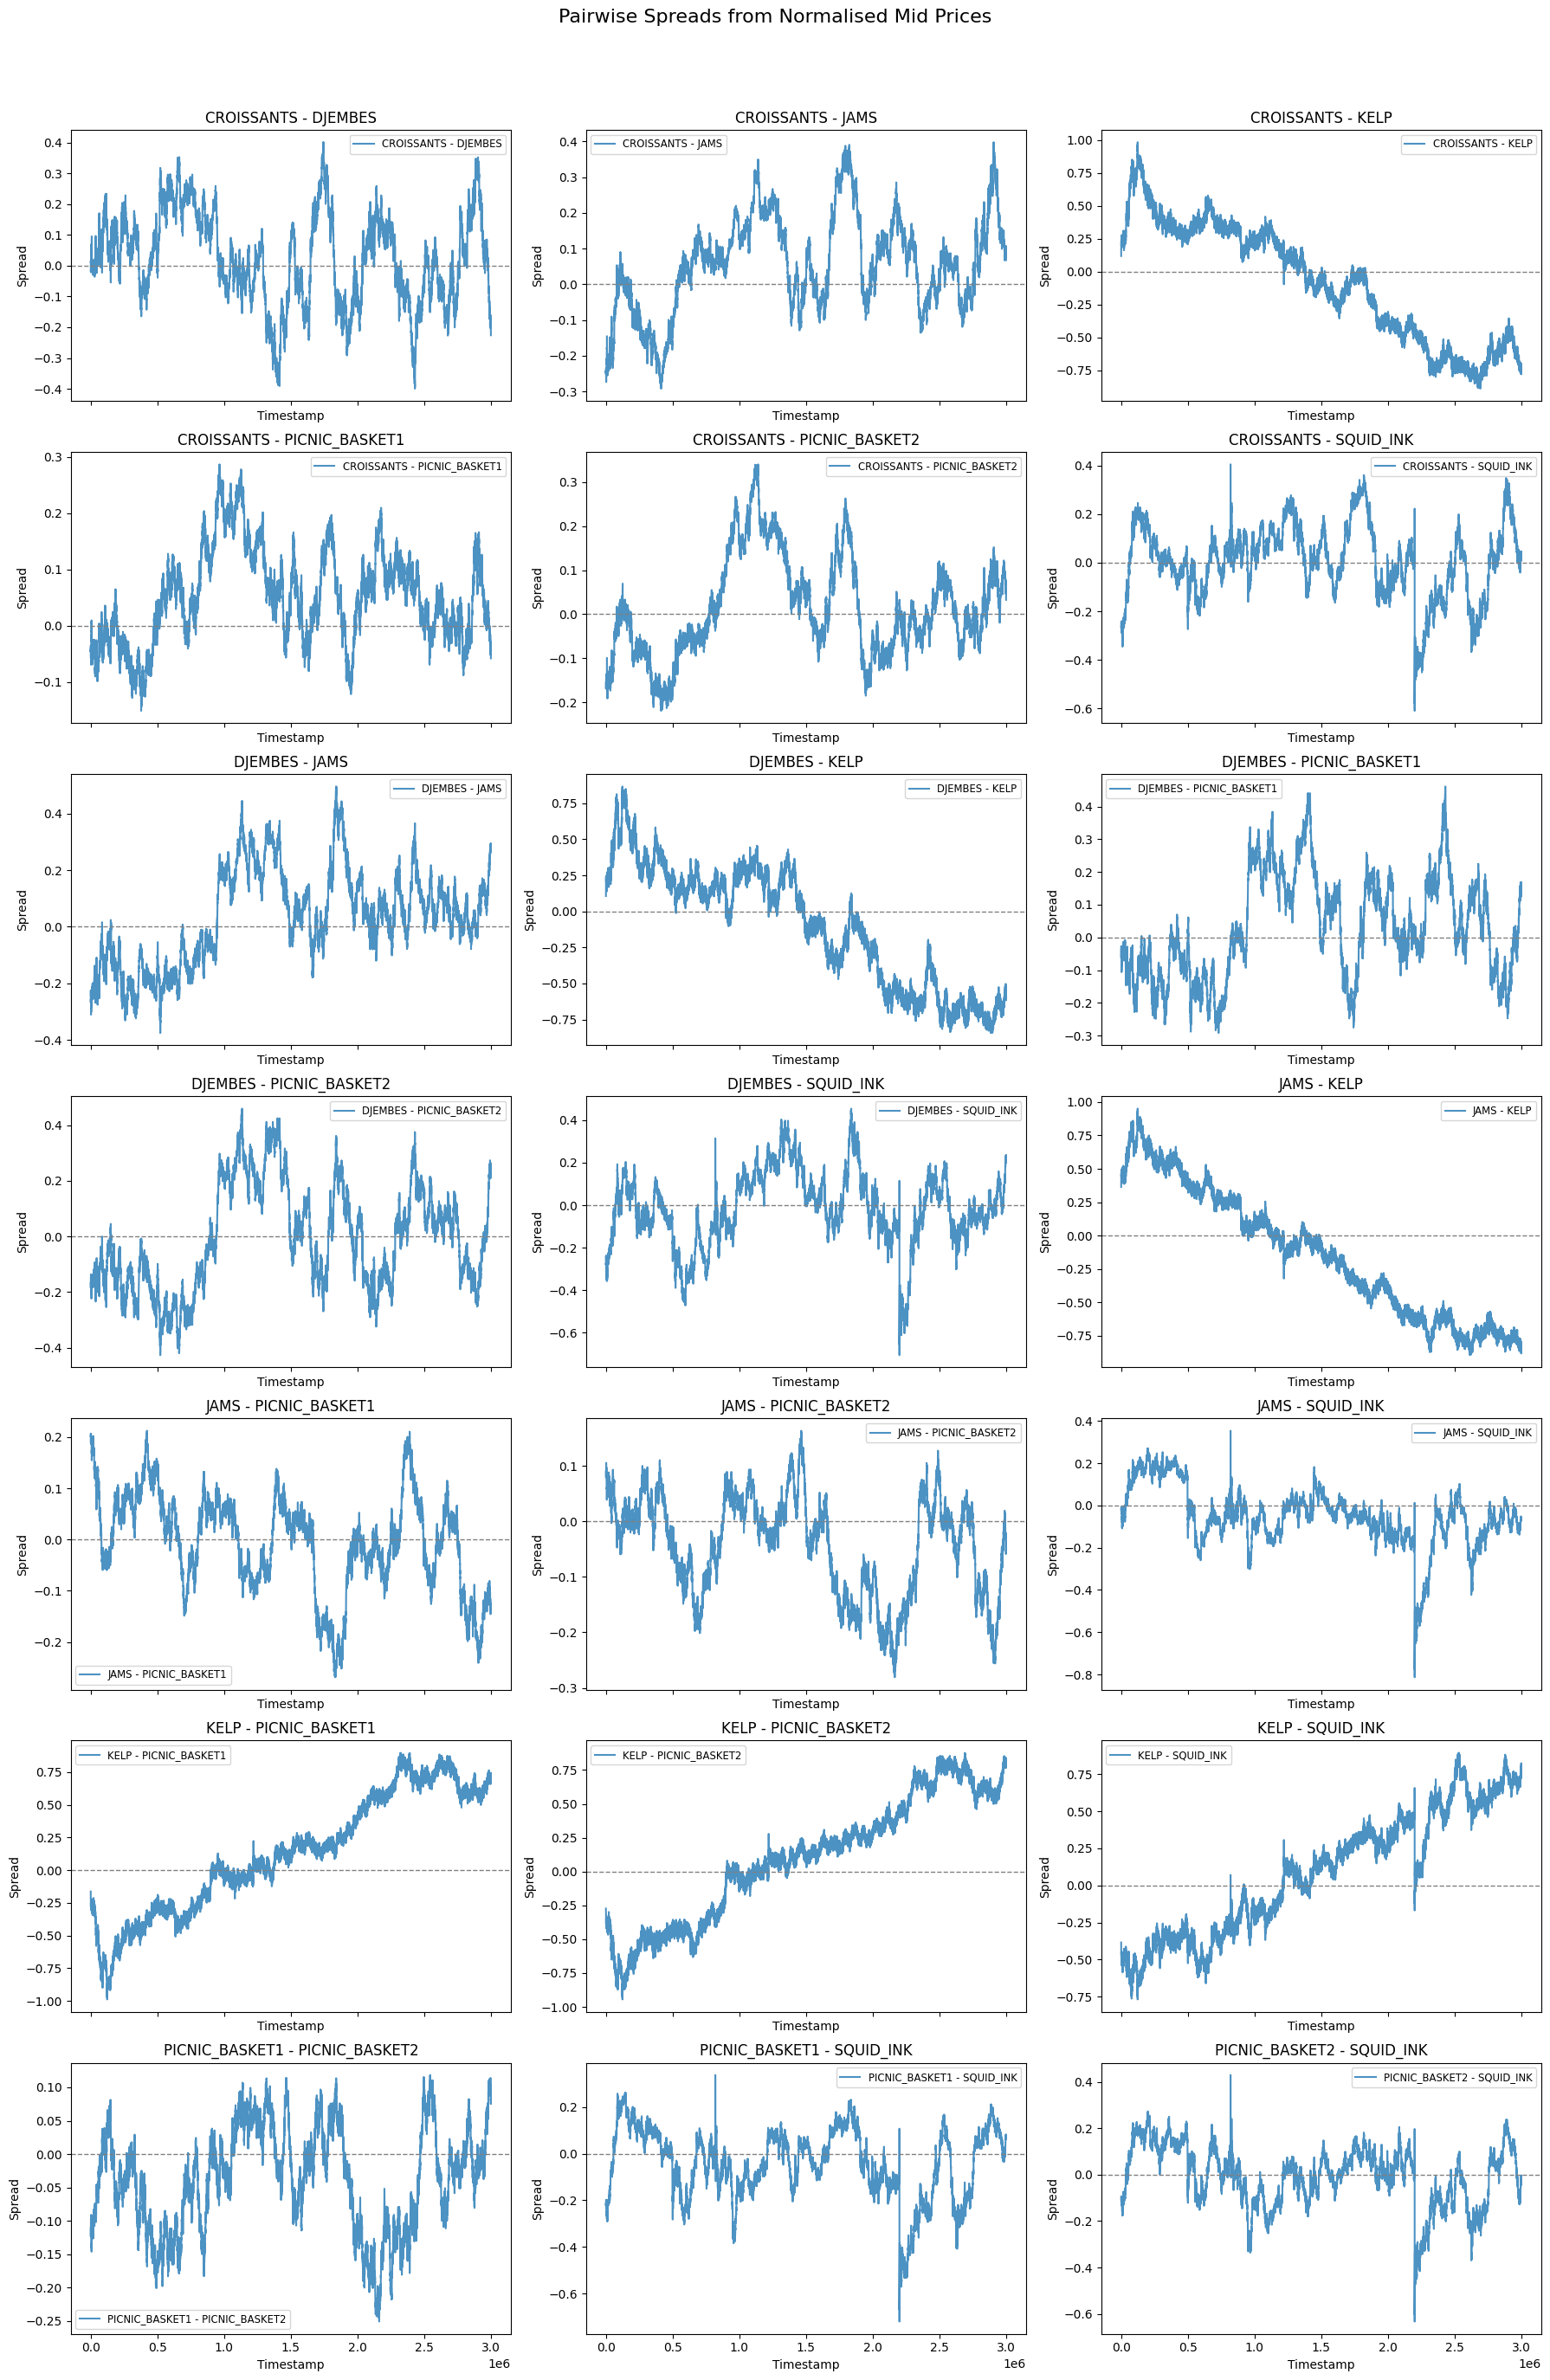

In [152]:
import matplotlib.pyplot as plt
from math import ceil

# Number of spreads (columns)
n = spreads.shape[1]
cols = 3
rows = ceil(n / cols)

# Create subplots
fig, axs = plt.subplots(rows, cols, figsize=(18, 4 * rows), sharex=True)
axs = axs.flatten()

# Plot each spread
for i, column in enumerate(spreads.columns):
    axs[i].plot(spreads.index, spreads[column], label=column, alpha=0.8)
    axs[i].axhline(0, color='gray', linestyle='--', linewidth=1)
    axs[i].set_title(column)
    axs[i].set_xlabel("Timestamp")
    axs[i].set_ylabel("Spread")
    axs[i].legend(fontsize='small')

# Hide unused axes
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Final layout
plt.suptitle("Pairwise Spreads from Normalised Mid Prices", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


COINTEGRATION TEST ON RESIDUALS! ____ ABOVE IS FOR SIMPLE  A - B not linear regression

In [153]:
from statsmodels.tsa.stattools import coint
from itertools import combinations
import pandas as pd

def check_cointegration(df):
    """
    Performs Engle-Granger cointegration tests on all unique column pairs in df.
    
    Parameters:
        df (pd.DataFrame): DataFrame where each column is a time series (e.g., mid price for a product).
    
    Returns:
        pd.DataFrame: A DataFrame containing pair names and their p-values.
    """
    results = []

    # Create all unique pairs of products
    pairs = combinations(df.columns, 2)

    for a, b in pairs:
        series_a = df[a]
        series_b = df[b]

        score, p_value, _ = coint(series_a, series_b)
        results.append({
            'pair': f"{a} - {b}",
            'p_value': p_value,
            'cointegrated': p_value < 0.05  # common threshold
        })

    return pd.DataFrame(results).sort_values(by='p_value')

# Example usage (replace `normalised_mid_prices` with your actual mid price DataFrame):
cointegration_results = check_cointegration(normalised_mid_prices)
print(cointegration_results)


                               pair   p_value  cointegrated
16            KELP - PICNIC_BASKET2  0.002771          True
20       PICNIC_BASKET2 - SQUID_INK  0.015401          True
14                 JAMS - SQUID_INK  0.021373          True
5            CROISSANTS - SQUID_INK  0.025735          True
6                    DJEMBES - JAMS  0.026425          True
3       CROISSANTS - PICNIC_BASKET1  0.030073          True
18  PICNIC_BASKET1 - PICNIC_BASKET2  0.032040          True
10              DJEMBES - SQUID_INK  0.033243          True
11                      JAMS - KELP  0.051398         False
0              CROISSANTS - DJEMBES  0.063379         False
19       PICNIC_BASKET1 - SQUID_INK  0.064918         False
13            JAMS - PICNIC_BASKET2  0.065886         False
12            JAMS - PICNIC_BASKET1  0.070407         False
1                 CROISSANTS - JAMS  0.070993         False
17                 KELP - SQUID_INK  0.093710         False
15            KELP - PICNIC_BASKET1  0.0

ASSUMING WE TRADE WITH THE A - B spread ---- WE MUST USE THE BELOW RESULTS!!!!!!!!

In [159]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def adf_test_on_spreads(spreads_df):
    """
    Runs Augmented Dickey-Fuller test on each column (spread) in the DataFrame.

    Parameters:
        spreads_df (pd.DataFrame): DataFrame with each column representing a spread.

    Returns:
        pd.DataFrame: A DataFrame with spread names, ADF test statistics, and p-values.
    """
    results = []
    Stationary_spreads = []

    for col in spreads_df.columns:
        series = spreads_df[col].dropna()  # drop NaNs for the test
        adf_result = adfuller(series)

        results.append({
            'spread': col,
            'adf_statistic': adf_result[0],
            'p_value': adf_result[1],
            'stationary': adf_result[1] < 0.05
        })

        if adf_result[1] < 0.05:
            Stationary_spreads.append(col)
            
    return pd.DataFrame(results).sort_values(by='p_value'), Stationary_spreads

# Example usage:
adf_results, stationary_spreads  = adf_test_on_spreads(spreads)
print(adf_results)


                             spread  adf_statistic   p_value  stationary
20       PICNIC_BASKET2 - SQUID_INK      -3.838038  0.002541        True
5            CROISSANTS - SQUID_INK      -3.713235  0.003931        True
10              DJEMBES - SQUID_INK      -3.662249  0.004677        True
3       CROISSANTS - PICNIC_BASKET1      -3.571926  0.006321        True
18  PICNIC_BASKET1 - PICNIC_BASKET2      -3.525007  0.007368        True
0              CROISSANTS - DJEMBES      -3.506033  0.007833        True
19       PICNIC_BASKET1 - SQUID_INK      -3.407706  0.010699        True
14                 JAMS - SQUID_INK      -3.316881  0.014141        True
1                 CROISSANTS - JAMS      -3.258380  0.016845        True
13            JAMS - PICNIC_BASKET2      -3.085912  0.027613        True
12            JAMS - PICNIC_BASKET1      -3.078601  0.028178        True
6                    DJEMBES - JAMS      -2.979915  0.036813        True
8          DJEMBES - PICNIC_BASKET1      -2.940222 

PLot stationary spreads

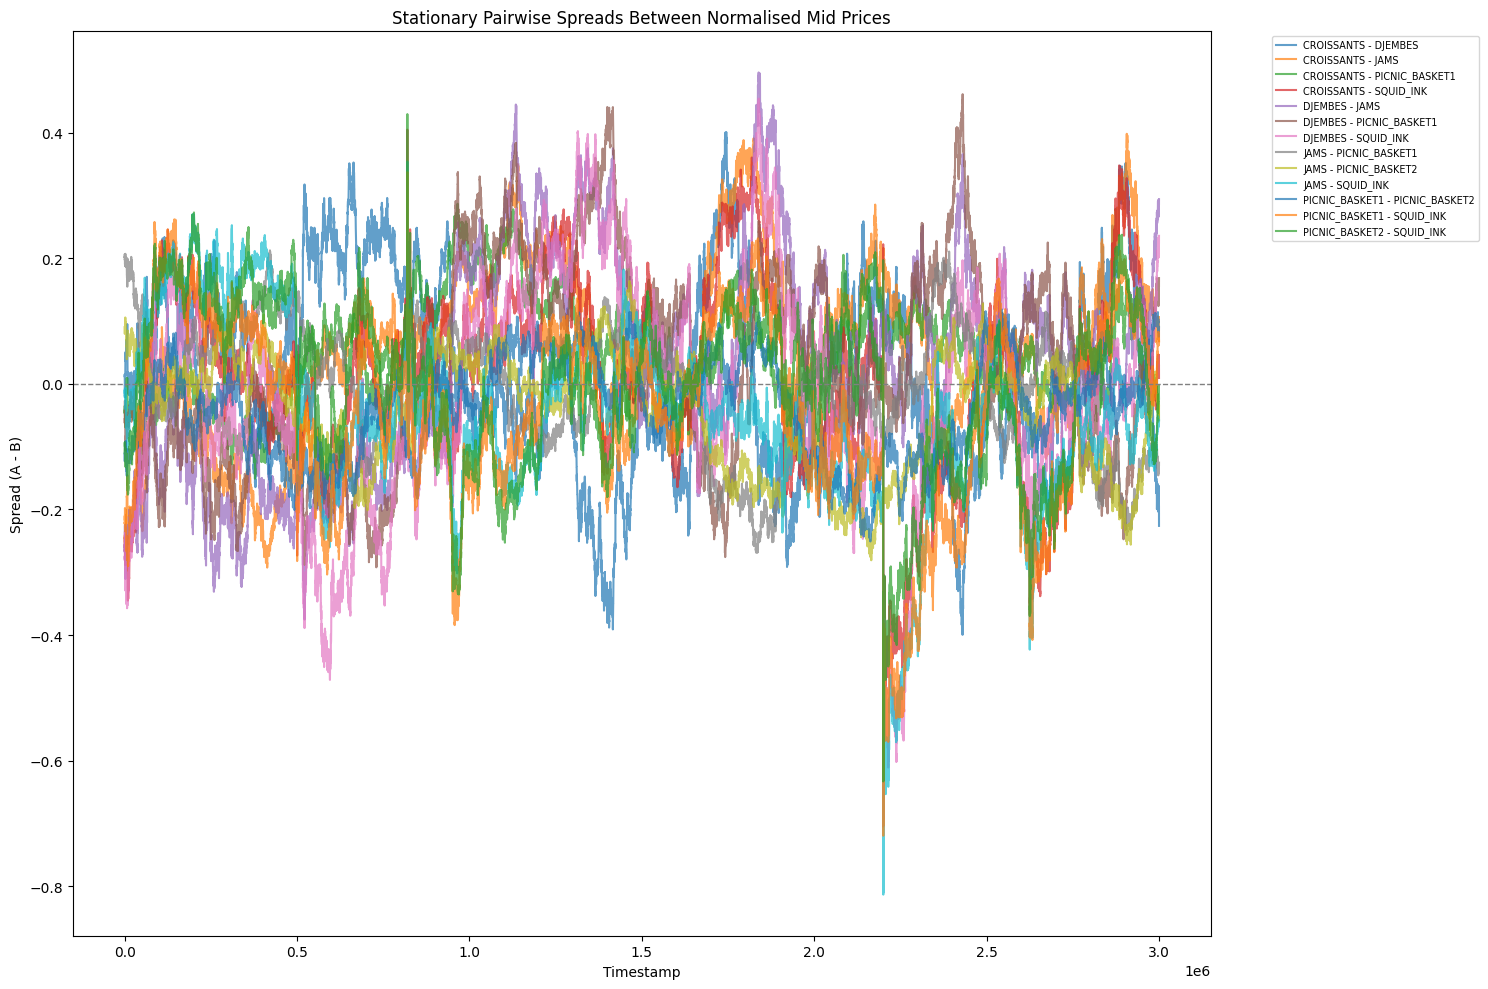

In [161]:

# Step 2: Plot only stationary spreads
plt.figure(figsize=(15, 10))

for column in stationary_spreads:
    plt.plot(spreads.index, spreads[column], label=column, alpha=0.7)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("Stationary Pairwise Spreads Between Normalised Mid Prices")
plt.xlabel("Timestamp")
plt.ylabel("Spread (A - B)")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='x-small')
plt.tight_layout()
plt.show()